<h1>Creazione serie storica decessi COVID-19 confermati

In [1]:
import pandas as pd
decessi_covid = pd.read_csv('../csv/decessi_covid19.csv')
decessi_covid.head()

,data,deceduti
0,2020-02-24,7.0
1,2020-02-25,3.0
2,2020-02-26,2.0
3,2020-02-27,5.0
4,2020-02-28,4.0


In [2]:
decessi_covid.data = pd.to_datetime(decessi_covid.data)
decessi_covid.deceduti = pd.to_numeric(decessi_covid.deceduti)

decessi_covid=decessi_covid.set_index('data')
decessi_covid.head()

,deceduti
data,
2020-02-24,7.0
2020-02-25,3.0
2020-02-26,2.0
2020-02-27,5.0
2020-02-28,4.0


In [3]:
ts_decessi_covid = decessi_covid.deceduti

<h1> Creazione serie storica dei decessi totali ISTAT

In [4]:
df = pd.read_csv('../csv/decessi_tot.csv')
df.head()

,Data,Totale
0,2015-01-01,2632
1,2015-01-02,2182
2,2015-01-03,2215
3,2015-01-04,2264
4,2015-01-05,2301


In [5]:
df['Data'] = pd.to_datetime(df['Data'])
df.Totale = pd.to_numeric(df.Totale)

In [6]:
#PERIODO COVID-19
df_covid_period = df[df['Data'] > '2020-02-23']
df_covid_period.head()

,Data,Totale
1880,2020-02-24,1902
1881,2020-02-25,1863
1882,2020-02-26,1808
1883,2020-02-27,1724
1884,2020-02-28,1805


In [7]:
df_covid_period = df_covid_period.set_index('Data')
df_covid_period.head()

,Totale
Data,
2020-02-24,1902
2020-02-25,1863
2020-02-26,1808
2020-02-27,1724
2020-02-28,1805


In [8]:
ts_covid_period = df_covid_period.Totale

<h1>Creazione serie storica predizione modello ARIMA

In [9]:
predictions = pd.read_csv('../csv/predictions_daily_ARIMA.csv')

predictions.dropna(inplace=True)
predictions.head()

,Unnamed: 0,0
0,2015-01-01,1790.661623
1,2015-01-02,2591.478055
2,2015-01-03,2292.515915
3,2015-01-04,2233.222115
4,2015-01-05,2256.919914


In [10]:
predictions.rename(columns={'Unnamed: 0': 'Data', '0':'Totale'}, inplace=True)
predictions.dropna(inplace=True)
predictions.head()

,Data,Totale
0,2015-01-01,1790.661623
1,2015-01-02,2591.478055
2,2015-01-03,2292.515915
3,2015-01-04,2233.222115
4,2015-01-05,2256.919914


In [11]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

#PERIODO COVID-19
predictions_covid_period = predictions[predictions['Data'] > '2020-02-23']
predictions_covid_period.head()

,Data,Totale
1880,2020-02-24,1746.345761
1881,2020-02-25,1746.872574
1882,2020-02-26,1747.393124
1883,2020-02-27,1747.907486
1884,2020-02-28,1748.415733


In [12]:
predictions_covid_period = predictions_covid_period.set_index('Data')
predictions_covid_period.head()

,Totale
Data,
2020-02-24,1746.345761
2020-02-25,1746.872574
2020-02-26,1747.393124
2020-02-27,1747.907486
2020-02-28,1748.415733


In [13]:
ts_predictions_covid_period = predictions_covid_period.Totale

<h1> CONFRONTO DELLE SERIE STORICHE DAL 24/02/2020 AL 30/04/2020

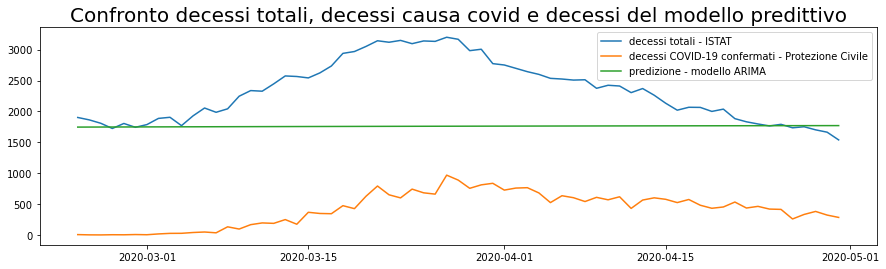

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=20)
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.plot(ts_decessi_covid, label='decessi COVID-19 confermati - Protezione Civile')
plt.plot(ts_predictions_covid_period, label='predizione - modello ARIMA')

plt.legend()
plt.show()

In [15]:
print('Decessi totali in data 27/03/2020 =', ts_covid_period['2020-03-27'])

Decessi totali in data 27/03/2020 = 3200


In [16]:
print('Decessi COVID-19 in data 27/03/2020 =', ts_decessi_covid['2020-03-27'])

Decessi COVID-19 in data 27/03/2020 = 969.0


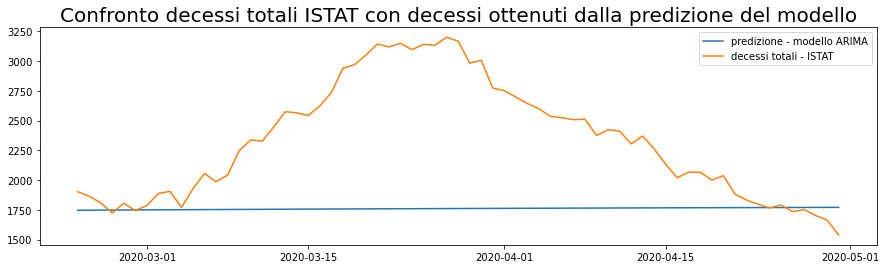

In [17]:
plt.figure(figsize=(15,4))
plt.title('Confronto decessi totali ISTAT con decessi ottenuti dalla predizione del modello', size=20)
plt.plot(ts_predictions_covid_period, label='predizione - modello ARIMA')
plt.plot(ts_covid_period, label='decessi totali - ISTAT')
plt.legend()
plt.show()

<p> <b>n:</b> decessi covid secondo il modello
    <br />
    <b>ts_covid_period:</b> decessi totali registrati dell'ISAT da febbraio a maggio
    <br />
    <b>ts_predictions_covid_period:</b> decessi previsti dal modello da febbraio a maggio 
</p>

<h2>Calcolo dei decessi COVID-19 secondo il modello predittivo</h2>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello ARIMA.

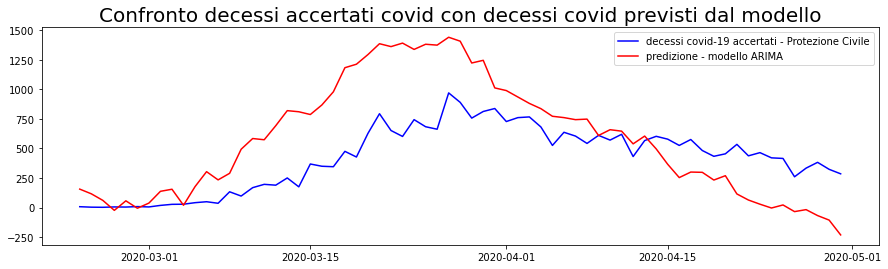

In [18]:
n = ts_covid_period - ts_predictions_covid_period 

plt.figure(figsize=(15,4))
plt.title('Confronto decessi accertati covid con decessi covid previsti dal modello', size=20)
plt.plot(ts_decessi_covid, color='blue', label='decessi covid-19 accertati - Protezione Civile')
plt.plot(n, color='red', label='predizione - modello ARIMA')
plt.legend()
plt.show()

<h3>Numero totale dei decessi accertati COVID-19 dal 24/02/2020 al 30/04/2020

In [19]:
m = ts_decessi_covid.sum()
print(int(m))

27967


<h3>Numero totale dei decessi COVID-19 previsti dal modello ARIMA dal 24/02/2020 al 30/04/2020</h3>

In [20]:
total = n.sum()
print(int(total))

38241


<h3>Stima del numero dei decessi COVID-19 non registrati secondo il modello predittivo ARIMA dal 24/02/2020 al 30/04/2020

In [21]:
x = ts_covid_period - ts_predictions_covid_period - ts_decessi_covid
x = x.sum()
print(int(x))

10274
